# K-Nearest Neighbors Decision Boundary Visualization
This is a visualization of 2D (2-feature) KNN algorithm which uses [Minkowski distance][1] to calculate the distance between to norms. The formula is as follows:  
$$ D\left(X,Y\right) = \left(\sum_{i=1}^n |x_i-y_i|^p\right)^{\frac{1}{p}} $$  
As you can see, this particular distance requires a value $p$ as an input. For $p=1$ the minkowski distance is equal to __Manhatan Distance__ and for $p=2$ it is as same as the __Euclidian Distance__.  

In this demonstration, you have access to _p_ , _k_ and you are free to create a maximum of 5 classes for your data.

## How to use?
The list of required packages and libraries are available at [github page][2].  

### To use the code:
1. Run all the cells.
2. At the bottom of the code, you will find an interactive GUI which is pretty self explanatory.
3. Add points by clicking on plot, add classes, set p and k and run KNN (You may need to wait a little bit for the plot to show).

Enjoy :))


   [1]: https://en.wikipedia.org/wiki/Minkowski_distance
   [2]: https://github.com/ark1375/ML_Visual

In [54]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import math
from collections import Counter
from scipy.spatial import distance
from sklearn.neighbors import KNeighborsClassifier

In [55]:
color_lis =  ['black','red','blue','green','gold']

data_x = []
data_y = []
data_class = []
class_num = 0

In [56]:
btn_add_cls = widgets.Button(
    description='Add Class',
    disabled=False,
    button_style=''
)

btn_calc_knn = widgets.Button(
    description='Run KNN',
    disabled=False,
    button_style=''
)

btn_reset = widgets.Button(
    description='Reset',
    disabled=False,
    button_style=''
)

slider_k = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='K:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

slider_mink = widgets.IntSlider(
    value=2,
    min=1,
    max=10,
    step=1,
    description='Dist-Coef:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [57]:
def initialize_grid(fig , ax):
    
    ax.clear()
    ax.scatter(x = [], y = [] )
    ax.set_ylim([-1,1])
    ax.set_xlim([-1,1])
    # ax.set_aspect('equal')
    ticks = np.linspace(-1,1,11)
    labels = list(ticks)
    labels = list( map( lambda x: f'{x:0.2f}' , labels) )
    ax.set_xticks(ticks , labels = labels)
    ax.set_yticks(ticks , labels = labels)
    ax.grid()
    
def draw_points(fig , ax):
    data = np.array([data_x , data_y , data_class]).T
    for d in data:
        ax.scatter( x = d[0] , y = d[1] , color = color_lis[int(d[2])] , s = 15)
    

In [58]:
def knn_lbl(data , px , py , p , k):
    
    dist_lis = []
    
    for d in data:
        dist = distance.minkowski( [px , py] , d[:2] , p)
        dist_lis.append( (dist , d[2]) )
        
    dist_lis.sort( key = lambda x: x[0])
    label_lis = list( map( lambda x: x[1] , dist_lis[:k] ) )
    counts = Counter(label_lis)
    
    min_label = min(counts , key = lambda x: counts[x])
    max_label = max(counts , key = lambda x: counts[x])
    
    if min_label == max_label:
        return min_label
    
    else: return max_label

def knn_bound(fig , ax):
    
    data = np.array( [data_x , data_y , data_class] ).T
    
    x_linspace = np.linspace(-1,1 , num = 101)
    y_linspace = np.linspace(1,-1 , num = 101)
    xm, ym = np.meshgrid(x_linspace, y_linspace)
    lm = np.zeros(xm.shape)
    
    p = slider_mink.value
    k = slider_k.value
    
    for i in range(xm.shape[0]):
        for j in range(xm.shape[1]):
            lm[i,j] = knn_lbl(data , xm[i,j] , ym[i,j] , p , k)
    
    initialize_grid(fig , ax)
    
    ax.contourf( 
        xm, ym, lm , colors = color_lis[ : class_num + 1] , levels = class_num,
        alpha = 0.35 , antialiased = True 
    )
    
    draw_points( fig , ax )


IntSlider(value=2, continuous_update=False, description='K:', max=10, min=1)

IntSlider(value=2, continuous_update=False, description='Dist-Coef:', max=10, min=1)

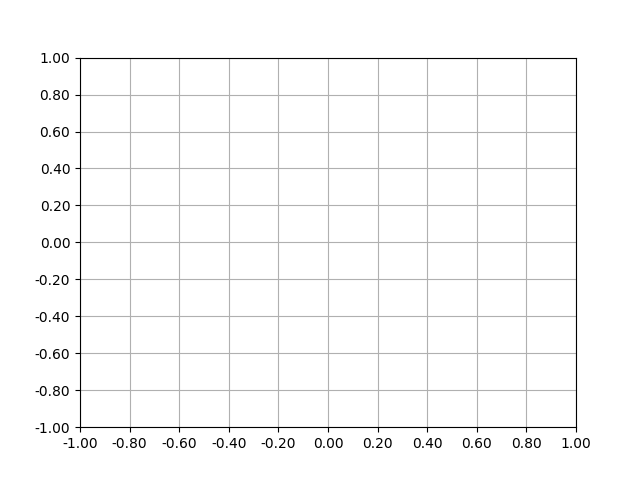

In [59]:
fig, ax = plt.subplots()
initialize_grid(fig , ax)

def onclick(event):
    ix, iy = event.xdata, event.ydata
    data_x.append(ix)
    data_y.append(iy)
    data_class.append(class_num)
    print(class_num)
    ax.scatter( x = [ix] , y = [iy] , color = color_lis[class_num] , s = 15)
    
def onaddcls(b):
    global class_num
    
    if len(data_x) != 0 and data_class[-1] == class_num :
        class_num += 1
    
    if class_num == 4:
        btn_add_cls.disabled = True
    
def onreset(b):
    global class_num
    initialize_grid(fig , ax)
    data_x.clear()
    data_y.clear()
    data_class.clear()
    class_num = 0
    btn_add_cls.disabled = False
    
def onknn(b):
    knn_bound(fig, ax)
    
cid = fig.canvas.mpl_connect('button_press_event', onclick)

btn_add_cls.on_click(onaddcls)
btn_reset.on_click(onreset)
btn_calc_knn.on_click(onknn)

fig.canvas.draw()

display(slider_k)
display(slider_mink)
display(widgets.HBox((btn_add_cls, btn_calc_knn , btn_reset)))
